## Importacion de librerias

In [1]:
import matplotlib.pyplot as plt
from main import Main
from conf.conf import Params
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from utils import functions

#### Fecth data: https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [2]:
main = Main(Params())

In [3]:
data_preparation_air_quality = main.pipeline.data_preparation_air_quality
data_preparation_air_quality.apply()

(9357, 15)
The sample time series is seasonal before the deseasonality False
The sample time series is seasonal after the deseasonality False


# Preparación de los datos

Este atributo realiza la limpieza y preprocesamiento de los datos crudos para dejarlos listos para análisis y modelado:

- Crea una copia del dataframe original para no modificar los datos crudos.

- Elimina columnas no deseadas como "Unnamed: 15" y "Unnamed: 16". 

- Elimina filas con valores missing.

- Almacena el nombre de la variable target en una variable.

- Elimina filas donde el valor de la variable target sea nulo.

- Convierte las columnas de fecha y hora en una sola columna datetime.

- Elimina las columnas originales de fecha y hora.

- Establece la columna datetime como índice del dataframe.

- Devuelve el dataframe preprocesado listo para análisis y modelado, con la columna CO(GT)_deseasonalize como variable a predecir

In [4]:
processed_data = data_preparation_air_quality.processed_data
processed_data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO(GT)_deseasonalize
datetime,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,-9.737788
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,-10.555218
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,-10.659663
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,-9.912500
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,-9.378739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,-4.745958
2005-04-04 11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,-5.278631
2005-04-04 12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,-5.623135


In [5]:
times_series_analysis = functions.Functions

# Function Guide: is_seasonal

The `is_seasonal` function takes a pandas DataFrame and a column name as input and determines if the data in the specified column is seasonal.

## Parameters

- `data`: This is the input DataFrame, which should be a pandas DataFrame object. This DataFrame should contain a time series in one of its columns.

- `column_name`: This is the name of the column in the DataFrame that contains the time series data. The function will check this column for seasonality.

## Function Body

The function uses the Augmented Dickey-Fuller (ADF) test to check for seasonality. The ADF test is a type of statistical test called a unit root test. The null hypothesis of the ADF test is that the time series has a unit root, i.e., it is non-stationary. If the p-value of the test (which is the second item returned by `adfuller()`) is less than the significance level (0.05 in this case), the null hypothesis is rejected and the time series is considered stationary.

In the context of this function, if the p-value is greater than 0.05, the function interprets this as the time series being non-stationary and thus potentially seasonal, returning `True`. If the p-value is less than or equal to 0.05, the function interprets this as the time series being stationary and thus not seasonal, returning `False`.

In [6]:
times_series_analysis.is_seasonal(processed_data, "CO(GT)")

False

# Guía de Función: seasonal_decomposition

La función `seasonal_decomposition` toma un DataFrame de pandas y un nombre de columna como entrada y realiza una descomposición estacional de los datos de la serie temporal en la columna especificada. La descomposición se realiza utilizando el método especificado por el parámetro `model`.

## Parámetros

- `data`: Este es el DataFrame de entrada, que debería ser un objeto DataFrame de pandas. Este DataFrame debe contener una serie temporal en una de sus columnas.

- `column_name`: Este es el nombre de la columna en el DataFrame que contiene los datos de la serie temporal. La función realizará la descomposición estacional en esta columna.

- `make_plot`: Este es un booleano que determina si la función debe crear un gráfico de la serie temporal original y sus componentes descompuestos. Si `True`, la función creará un gráfico. Si `False`, no lo hará.

- `model`: Este es el tipo de descomposición estacional a realizar. Debe ser `'additive'` o `'multiplicative'`. Un modelo aditivo se usa cuando la variación estacional es aproximadamente constante a lo largo de la serie temporal, mientras que un modelo multiplicativo se usa cuando la variación estacional cambia proporcionalmente al nivel de la serie temporal.

## Cuerpo de la función

La función utiliza la función `seasonal_decompose` de la biblioteca `statsmodels` para realizar la descomposición estacional. Luego, opcionalmente crea un gráfico de la serie temporal original y sus componentes de tendencia, estacionalidad y residuales.

## Trend Component

El componente de tendencia refleja la progresión general de la serie temporal (aumentando o disminuyendo). Representa la progresión a largo plazo de la serie (varios años, por ejemplo).

## Seasonal Component

El componente estacional refleja el patrón repetible de fluctuaciones en la serie temporal dentro de un cierto período (un día, una semana, un mes, un trimestre, un año, etc.). Representa las variaciones a corto plazo que se asume son una repetición del mismo patrón a lo largo del tiempo.

## Residual Component

El componente residual es lo que queda después de que los componentes de tendencia y estacionalidad se hayan eliminado de la serie temporal. Representa el error de la predicción, la parte de la serie temporal que el modelo no pudo explicar.

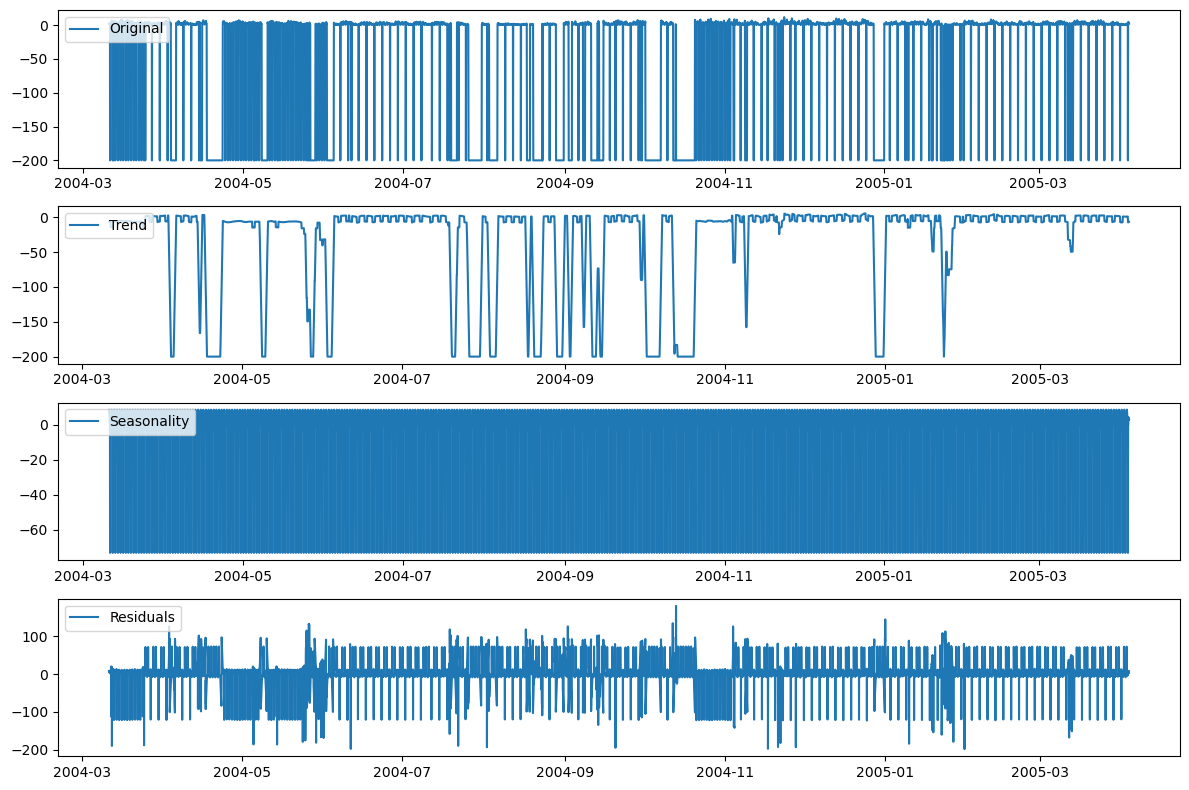

In [7]:
times_series_analysis.seasonal_decomposition(processed_data, "CO(GT)", make_plot=True)

# Función: deseasonalize_data

La función `deseasonalize_data` toma un DataFrame de pandas y un nombre de columna como entrada, y elimina el componente estacional de los datos de la serie temporal en la columna especificada. La descomposición se realiza utilizando la descomposición de la tendencia estacional utilizando LOESS (STL).

## Parámetros

- `data`: Este es el DataFrame de entrada, que debería ser un objeto DataFrame de pandas. Este DataFrame debe contener una serie temporal en una de sus columnas.

- `column_name`: Este es el nombre de la columna en el DataFrame que contiene los datos de la serie temporal. La función eliminará el componente estacional de esta columna.

- `make_plot`: Este es un booleano que determina si la función debe crear un gráfico de la serie temporal original y la serie desestacionalizada. Si es `True`, la función creará un gráfico. Si es `False`, no lo hará.

- `seasonal_period`: Esta es la longitud de cada "temporada" en tus datos. La función lo utiliza para descomponer la serie temporal.

## Cuerpo de la función

La función utiliza el método STL de la biblioteca `statsmodels` para realizar la descomposición estacional. Luego resta el componente estacional de la serie temporal original para crear la serie desestacionalizada. Si `make_plot` es `True`, la función también crea un gráfico de la serie original y desestacionalizada.

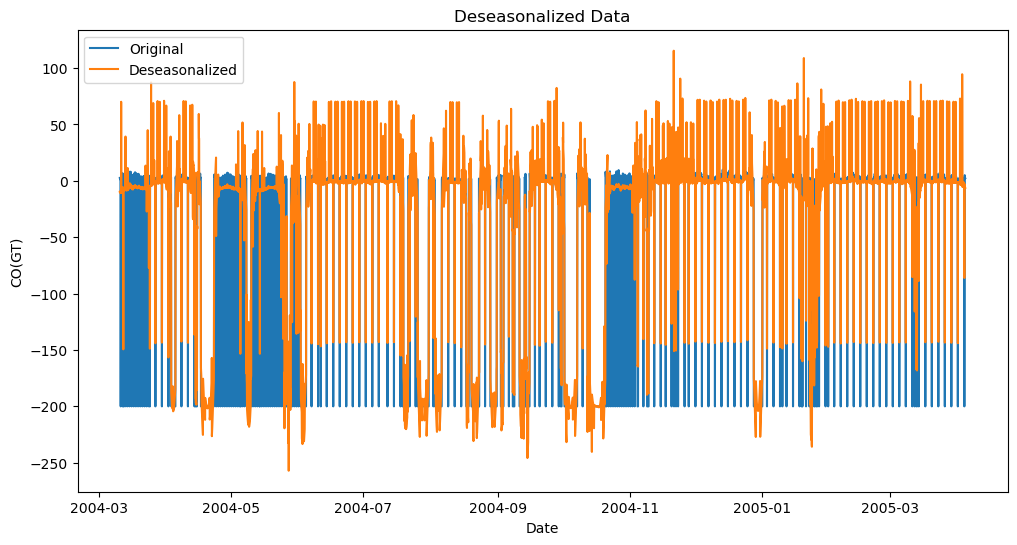

datetime
2004-03-10 18:00:00    -9.737788
2004-03-10 19:00:00   -10.555218
2004-03-10 20:00:00   -10.659663
2004-03-10 21:00:00    -9.912500
2004-03-10 22:00:00    -9.378739
                         ...    
2005-04-04 10:00:00    -4.745958
2005-04-04 11:00:00    -5.278631
2005-04-04 12:00:00    -5.623135
2005-04-04 13:00:00    -5.930985
2005-04-04 14:00:00    -6.243809
Length: 9357, dtype: float64

In [8]:
times_series_analysis.deseasonalize_data(processed_data, "CO(GT)", make_plot=True)

# Intanciamos el modelo

La función `model_air_quality` se encarga de construir y configurar un modelo secuencial utilizando la biblioteca Keras. En este caso, el modelo construido es una red neuronal de tipo LSTM (Long Short-Term Memory) que se utiliza comúnmente para problemas de series temporales.

## El modelo

- `model = Sequential()`: Este comando inicializa un modelo secuencial en Keras

- `model.add(LSTM(50, input_shape=(self.look_back, 14)))`: Este comando agrega una capa LSTM al modelo con 50 unidades (o "neuronas"). El parámetro `input_shape` define la forma de los datos de entrada, que en este caso tiene `self.look_back` timesteps y 14 características por timestep.

- `model.add(Dense(1))`: Este comando agrega una capa densa (o completamente conectada) al modelo con 1 unidad. Esta capa densa sirve como la capa de salida del modelo, que predice el valor objetivo.

- `model.compile(loss='mean_squared_error', optimizer='adam')`: Este comando compila el modelo con la función de pérdida de error cuadrático medio y el optimizador Adam. La función de pérdida es la métrica que el modelo intentará minimizar durante el entrenamiento, y el optimizador especifica el algoritmo de optimización que se utilizará para ajustar los pesos de la red.

In [9]:
predictor = main.pipeline.model_air_quality

# Función: fit

La función `fit` es responsable de entrenar el modelo LSTM en los datos proporcionados. Realiza varias etapas clave en el proceso de entrenamiento del modelo, que se detallan a continuación:

1. **Preprocesamiento de los datos**: La función comienza llamando a los datos preprocesados.

2. **Normalización de los datos**: Los datos se normalizan para asegurarse de que todas las características estén en la misma escala. Esto se hace utilizando un objeto `scaler`, que es un atributo de la clase actual.

3. **Creación de conjuntos de datos de entrada y salida**: Los datos se reorganizan en conjuntos de datos de entrada (X) y salida (Y) para el entrenamiento del modelo.

4. **Definición de la parada temprana**: Se define una condición de parada temprana para el entrenamiento. Esto detendrá el entrenamiento si la pérdida de validación no mejora después de un cierto número de épocas consecutivas.

5. **Entrenamiento del modelo**: Finalmente, la función entrena el modelo en los datos. El entrenamiento se realiza durante un número específico de épocas, con un tamaño de lote específico, y se divide un porcentaje de los datos para la validación. La parada temprana se utiliza como una callback para detener el entrenamiento temprano si es necesario.

In [10]:
predictor.fit(processed_data)

Epoch 1/20
116/116 [==============================] - 14s 84ms/step - loss: 0.0671 - val_loss: 0.0309
Epoch 2/20
116/116 [==============================] - 7s 62ms/step - loss: 0.0293 - val_loss: 0.0265
Epoch 3/20
116/116 [==============================] - 10s 88ms/step - loss: 0.0255 - val_loss: 0.0249
Epoch 4/20
116/116 [==============================] - 9s 75ms/step - loss: 0.0243 - val_loss: 0.0238
Epoch 5/20
116/116 [==============================] - 9s 75ms/step - loss: 0.0226 - val_loss: 0.0233
Epoch 6/20
116/116 [==============================] - 9s 78ms/step - loss: 0.0221 - val_loss: 0.0233
Epoch 7/20
116/116 [==============================] - 12s 103ms/step - loss: 0.0210 - val_loss: 0.0231
Epoch 8/20
116/116 [==============================] - 11s 98ms/step - loss: 0.0210 - val_loss: 0.0251
Epoch 9/20
116/116 [==============================] - 11s 92ms/step - loss: 0.0205 - val_loss: 0.0230
Epoch 10/20
116/116 [==============================] - 11s 95ms/step - loss: 0.0201 -

# Función: predict_next

La función `predict_next` se utiliza para hacer predicciones de los próximos puntos de datos en una serie de tiempo utilizando el modelo LSTM entrenado. 

Esta función sigue varios pasos clave:

1. **Preprocesamiento de los datos**: Similar a la función `fit`, `predict_next` comienza preprocesando los datos de entrada.

2. **Generación de la secuencia de entrada**: La función crea la secuencia de entrada para las predicciones a partir de los últimos puntos de datos en el conjunto de entrenamiento.

3. **Predicción de los próximos puntos**: La función realiza un bucle para predecir los próximos `n_points` en la serie de tiempo. En cada iteración, realiza una predicción utilizando la secuencia de entrada actual, agrega la predicción a la lista de predicciones y luego actualiza la secuencia de entrada para la próxima predicción.

4. **Desnormalización de las predicciones**: Después de que todas las predicciones han sido generadas, se desnormalizan para que estén en la misma escala que los datos originales.

In [11]:
predictions = predictor.predict_next(100, processed_data)
predictions

1/1 [==============================] - 0s 31ms/step


array([-216.22004612, -217.64507632, -279.94420046, -336.17660683,
       -336.27211658, -336.36575706, -421.54677411, -414.37892032,
       -338.95269202, -336.70135472, -280.49332468, -279.12235183,
       -336.22028215, -416.79184869, -430.03307165, -424.28245521,
       -432.5579038 , -448.55966414, -417.35242852, -460.45541467,
       -489.75116704, -437.41642231, -420.55055262, -244.36266384,
       -232.16539198, -281.04841036, -350.19079945, -336.33370155,
       -336.33511614, -336.33123866, -373.7725504 , -338.30727498,
       -336.02162136, -280.67810485, -280.39290178, -264.17870108,
       -311.81435861, -402.1039347 , -408.09823867, -336.31389736,
       -251.67595781, -402.52881541, -424.35068367, -428.66173253,
       -451.78390754, -430.04357999, -424.09951905, -297.09639732,
       -353.22965644, -411.33368507, -406.96263003, -402.59694283,
       -410.64450431, -401.67986232, -410.70904475, -412.06332044,
       -404.55589046, -342.35433953, -336.3362276 , -336.29654

# Plot de la predicción en funcion del tiempo 

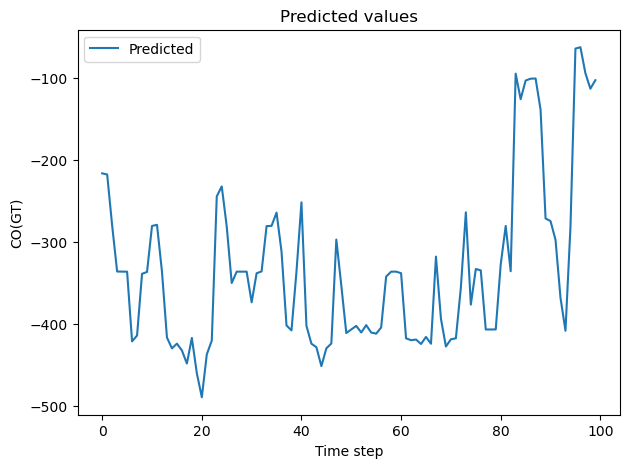

In [12]:
predictor.plotter(predictions)